---


#                                                           STOCK PRICE PREDICTION MODEL

---


``CREATED BY: Sajan Sahikarmi`` <br> ``Roll Number: KCE080BCT035``

---


#### Description: 
``This is a python based Regression model which uses linear regression to predict the future prices of stocks of a particular company (Tesla) based on data refering to the history of the stock which was collected from a ML tutorial by a channel named "Simplilearn". ``<br>


``Here is the link to the dataset:`` [Stock Market Dataset](https://drive.google.com/drive/folders/1WOg7cWGQkG2Ocz_19xpv8zL5jazBy7In)
<br>``Here is the link to the Video:`` [Vid Tutorial from *Simplilearn*](https://www.youtube.com/watch?v=OXwZtlcTiuk&t=541s)    

`Here is a small breakdown of the Dataset used in the Project:`
| SN  | Feature of Dataset          | Meaning                                  |
|-----|-----------------------------|-----------------------------------------|
| 1   | Date                        | Date when the Stock was studied (Trading Day) |
| 2   | Open                        | The Value of the Stock when the market Opened on the Trading Day |
| 3   | High                        | The highest value of the stock on the date mentioned |
| 4   | Low                         | The lowest Value of the stock on the date mentioned |
| 5   | Close                       | The closing price of the stock at the end of the trading day. |
| 6   | Adj Close                   | The adjusted closing price of the stock after accounting for any distributions or splits. |
| 7   | Volume                      | The number of shares traded on the date mentioned.|


---


# Dataset Inclusion & Library Importing 

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import warnings
from sklearn.model_selection import train_test_split # sklearn is used to import the predictive model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler  # used for preprocessing
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression # Since this is a predictive model , we use a linear regression model
from datetime import timedelta #  used to generate the future dates
warnings.filterwarnings("ignore")

 

In [44]:
df= pd.read_csv("tesla.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


---

# Data Wrangling

In [45]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29/06/2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30/06/2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,1/7/2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2/7/2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,6/7/2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [46]:
df.shape

(2193, 7)

→ **There are 2193 entries and 7 features in this dataset**


In [47]:
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

→ **since there are no missing values in the dataset, our work for data Cleaning becomes a whole lot easier**

In [48]:

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [49]:
print(df.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [50]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
#Add Month column
df['Month'] = df['Date'].dt.month
# Add Weekday column
df["Weekday"] = df["Date"].dt.day_name()

→ **We Convert the date column to appropriate format.** <br>
→ **Also we  create a new column called `Weekday`so that we can do** *day-of-the-week* **analysis in the future.**

In [51]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2193 non-null   datetime64[ns]
 1   Open       2193 non-null   float64       
 2   High       2193 non-null   float64       
 3   Low        2193 non-null   float64       
 4   Close      2193 non-null   float64       
 5   Adj Close  2193 non-null   float64       
 6   Volume     2193 non-null   int64         
 7   Month      2193 non-null   int32         
 8   Weekday    2193 non-null   object        
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1), object(1)
memory usage: 145.8+ KB


,Date,Open,High,Low,Close,Adj Close,Volume,Month,Weekday
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,6,Tuesday
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,6,Wednesday
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,7,Thursday
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,7,Friday
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,7,Tuesday


In [52]:
df.duplicated().sum()

np.int64(0)

→ **There are no duplicates. If there were any duplicates, we would  have needed  to remove those  redundant rows.**

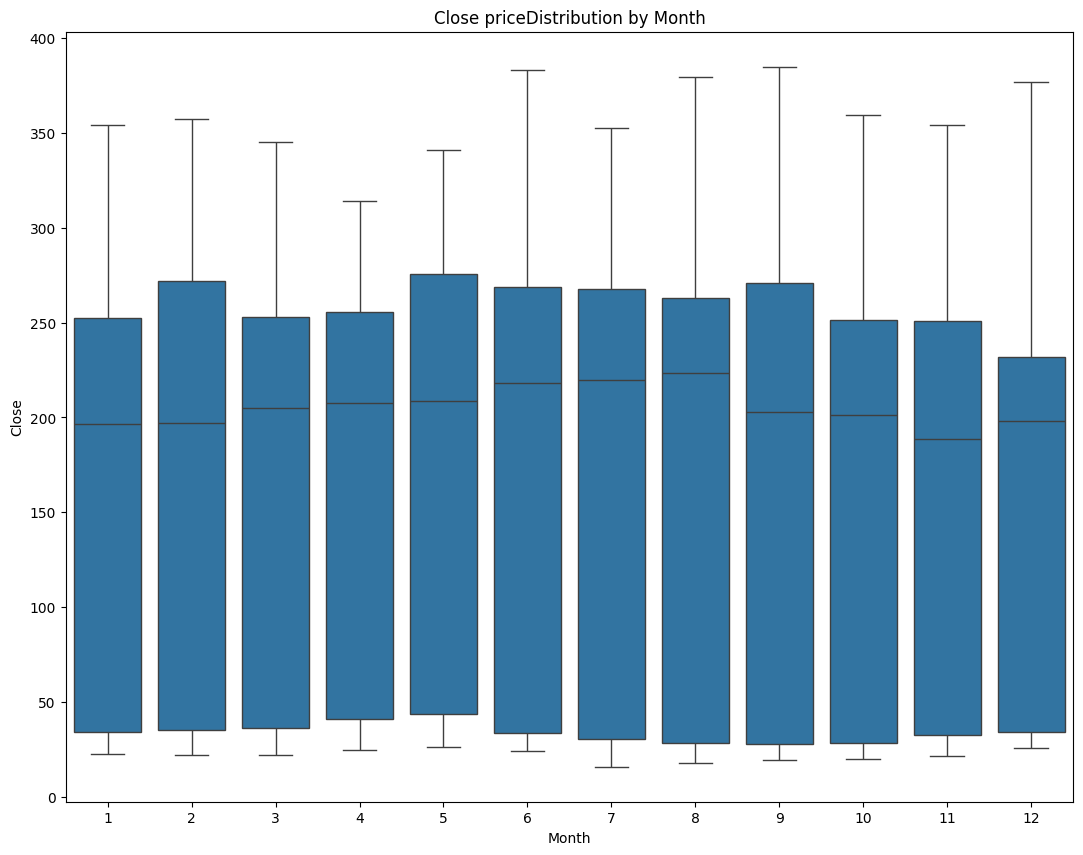

In [53]:
# to check if there are any Outliers
plt.figure(figsize=(13,10))
sn.boxplot(x='Month', y='Close', data=df)
plt.title('Close priceDistribution by Month')
plt.xticks(rotation=0)
plt.show()

→ Here since there are **no entries** that **lie outside of the whiskers of the box plot** , it is very obvious that the data is free of any ouotliers interms of **close price of stock** per month

---


# EDA

# 1. Trend Analysis
#### A. Long Term Trends
     Following charts summarize the lifetime trend of the *Tesla* stock

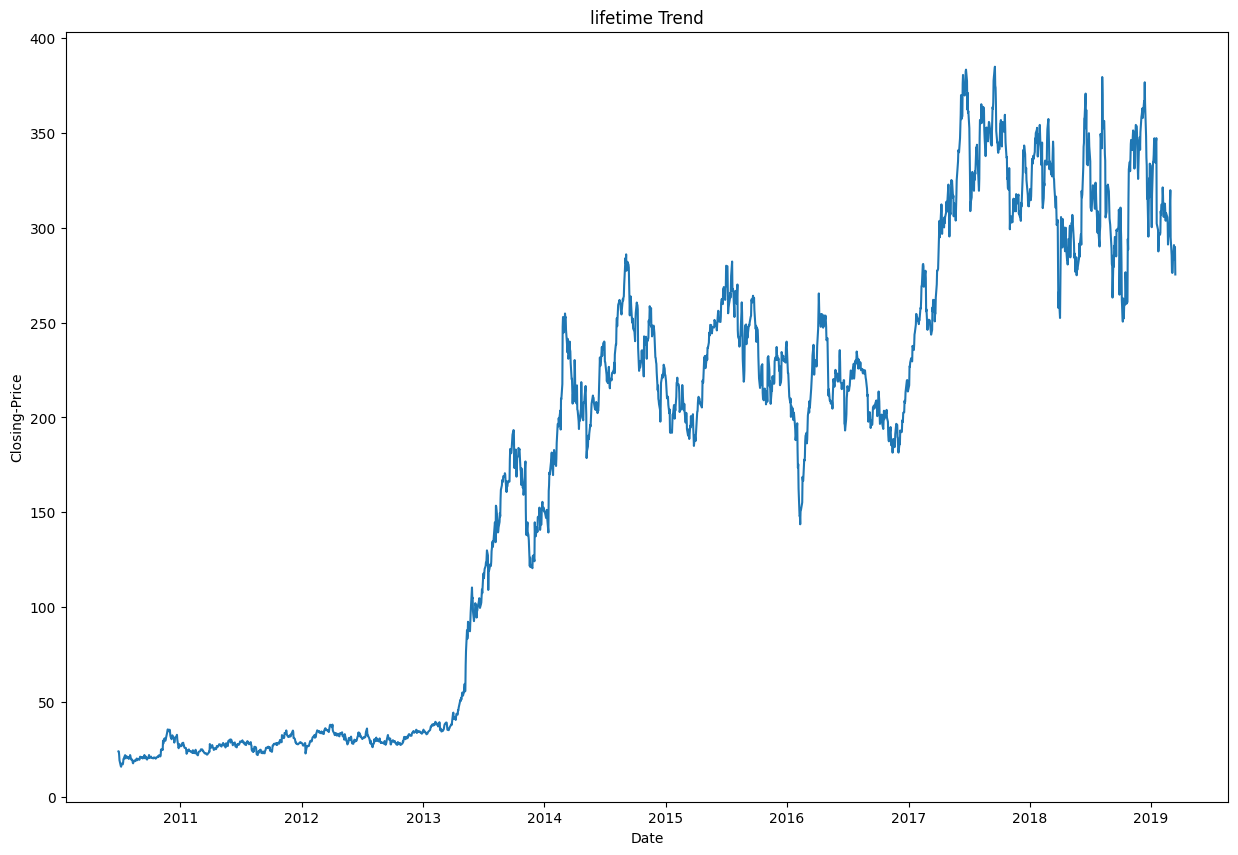

In [54]:
plt.figure(figsize=(15,10))
plt.plot(df["Date"],df["Close"])
plt.xlabel("Date")
plt.ylabel("Closing-Price")
plt.title("lifetime Trend")
plt.show()

`Inference` <BR>
**The visualization demonstrates Tesla's stock price evolution, characterized by three distinct phases: an initial period of stability (2011-2013) with prices around $25-30, followed by a dramatic surge in 2013 where prices jumped from $30 to over $200, and finally a highly volatile period (2014-2019) showing an overall upward trend with prices fluctuating between $250-400. This pattern reflects the company's transformation from a stable, low-value stock to a volatile, high-value market player.**

#### B. Seasonality Check  
     
```Following charts summarize the Monthly seasonality analysis:-```

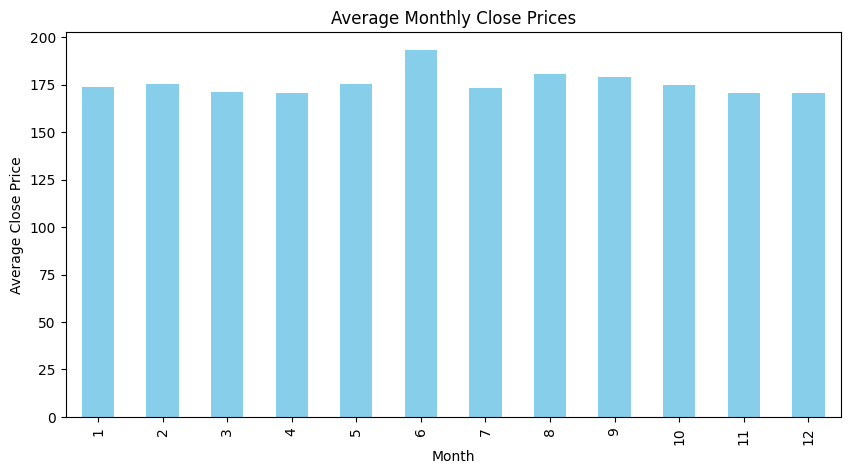

In [55]:

# Calculate average close price per month
monthly_avg = df.groupby('Month')['Close'].mean()

# Plot monthly averages
plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Close Prices')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.show()


**Based on the monthly average close price chart for Tesla stock, there is a clear pattern of price fluctuations throughout the year. The data shows a notable peak in Month 6 (June) where prices reach nearly 200, followed by relatively stable prices in other months with slight variations, and somewhat lower averages towards the end of the year (Months 11-12). The overall price range stays between approximately 170-200, suggesting moderate seasonal variation in Tesla's stock performance with a mid-year strength and year-end softness.**

#### C. Day of the Week Effect
     Following charts summarize the Day of the week effect on the closing price:

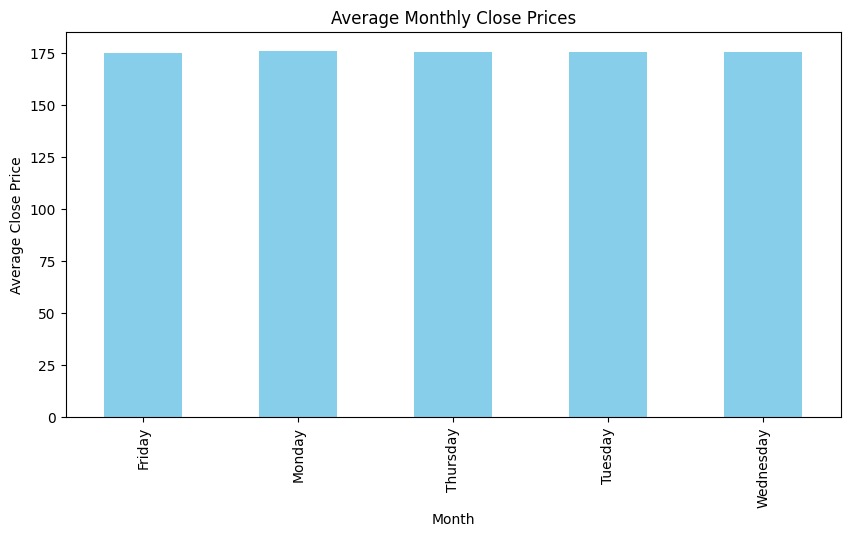

In [56]:
daily_avg= df.groupby('Weekday')['Close'].mean()
plt.figure(figsize=(10, 5))
daily_avg.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Close Prices')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.show()

**Here we see from the graph that all the weekdays have equal closing price for the stock**

---
# 2. Price Volatility & Risk Assessment 
 #### a. Daily Price Change Calculation (Daily Return):
    We engineer a new feature to observe the price Volatility

In [57]:
df["daily_returns"]=(df["Close"]-df["Open"])/df["Open"]*100
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Weekday,daily_returns
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,6,Tuesday,25.736837
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,6,Wednesday,-7.599848
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,7,Thursday,-12.160004
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,7,Friday,-16.521735
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,7,Tuesday,-19.449995


### b. Rolling Volatility
 `We engineer two more new feautres (7 day and 30 day standard deviations) for accessing the volatility using the daily returns`

In [58]:
df['7-Day Rolling Std'] = df['daily_returns'].rolling(window=7).std()
df['30-Day Rolling Std'] = df['daily_returns'].rolling(window=30).std()


In [59]:
print("\n\nThe 7th row")
print(df.iloc[7])
print("\n\nThe 29th row")
print(df.iloc[29])



The 7th row
Date                  2010-07-09 00:00:00
Open                                17.58
High                                 17.9
Low                             16.549999
Close                                17.4
Adj Close                            17.4
Volume                            4050600
Month                                   7
Weekday                            Friday
daily_returns                   -1.023891
7-Day Rolling Std                9.560509
30-Day Rolling Std                    NaN
Name: 7, dtype: object


The 29th row
Date                  2010-08-10 00:00:00
Open                                19.65
High                                19.65
Low                                 18.82
Close                           19.030001
Adj Close                       19.030001
Volume                            1281300
Month                                   8
Weekday                           Tuesday
daily_returns                   -3.155211
7-Day Rolling Std       

### C. Bollinger's Band Calculation
 `We identify the overbought and oversold conditions using 20 day SMA+-2SD by engineering two more new features that are overbought and oversold`

`note:` SMA - Simple Moving Average

In [60]:
window = 20

# 20-day Simple Moving Average (SMA)
df['20-Day SMA'] = df['Close'].rolling(window=window).mean()

# 20-day Rolling Standard Deviation
df['20-Day Std'] = df['Close'].rolling(window=window).std()

# Upper and Lower Bollinger Bands
df['Upper Band'] = df['20-Day SMA'] + (2 * df['20-Day Std'])
df['Lower Band'] = df['20-Day SMA'] - (2 * df['20-Day Std'])

# Identify Overbought/Oversold Conditions
df['Overbought'] = df['Close'] > df['Upper Band']
df['Oversold'] = df['Close'] < df['Lower Band']

# Display the DataFrame
# print(df)
window = 20

# 20-day Simple Moving Average (SMA)
df['20-Day SMA'] = df['Close'].rolling(window=window).mean()

# 20-day Rolling Standard Deviation
df['20-Day Std'] = df['Close'].rolling(window=window).std()

# Upper and Lower Bollinger Bands
df['Upper Band'] = df['20-Day SMA'] + (2 * df['20-Day Std'])
df['Lower Band'] = df['20-Day SMA'] - (2 * df['20-Day Std'])

# Identify Overbought/Oversold Conditions
df['Overbought'] = df['Close'] > df['Upper Band']
df['Oversold'] = df['Close'] < df['Lower Band']

# Display the DataFrame
print(df)
df.info()
df.iloc[2]

           Date        Open        High         Low       Close   Adj Close  \
0    2010-06-29   19.000000   25.000000   17.540001   23.889999   23.889999   
1    2010-06-30   25.790001   30.420000   23.299999   23.830000   23.830000   
2    2010-07-01   25.000000   25.920000   20.270000   21.959999   21.959999   
3    2010-07-02   23.000000   23.100000   18.709999   19.200001   19.200001   
4    2010-07-06   20.000000   20.000000   15.830000   16.110001   16.110001   
...         ...         ...         ...         ...         ...         ...   
2188 2019-03-11  283.519989  291.279999  280.500000  290.920013  290.920013   
2189 2019-03-12  286.489990  288.070007  281.059998  283.359985  283.359985   
2190 2019-03-13  283.899994  291.989990  282.700012  288.959991  288.959991   
2191 2019-03-14  292.450012  295.390015  288.290009  289.959991  289.959991   
2192 2019-03-15  283.510010  283.723999  274.399994  275.429993  275.429993   

        Volume  Month    Weekday  daily_returns  7-

Date                  2010-07-01 00:00:00
Open                                 25.0
High                                25.92
Low                                 20.27
Close                           21.959999
Adj Close                       21.959999
Volume                            8218800
Month                                   7
Weekday                          Thursday
daily_returns                  -12.160004
7-Day Rolling Std                     NaN
30-Day Rolling Std                    NaN
20-Day SMA                            NaN
20-Day Std                            NaN
Upper Band                            NaN
Lower Band                            NaN
Overbought                          False
Oversold                            False
Name: 2, dtype: object

#### Price Gaps & Outliers
- **1. Price Gaps** <br>
    - Price gaps occur when there is a discontinuity in price between two trading sessions. This happens when the opening price of a session is significantly different from the previous session's closing price.
    - Steps to Identify Price Gaps:
        - Calculate the Gap:
            Gap Up =Open Price Today  − Close Price Yesterday 
            Gap Down= Close Price Yesterday − Open Price Today
        - Set a Threshold:
            Define a percentage or absolute value threshold to classify significant gaps (e.g., 2% of the previous day's close).
        - Classify Gaps:
            Gap Up: Positive difference exceeding the threshold.
            Gap Down: Negative difference exceeding the threshold.
-  **2. Sudden Price Jumps/Drops** <br>
    - Sudden price movements within a trading session can indicate potential market shifts.
    - Steps to Identify Sudden Jumps/Drops:
        - Calculate the percentage change in price between consecutive time intervals:
            Price Change=Close−Open/Open × 100
        - Define a threshold for "sudden" changes (e.g., ±5%).
        - Flag entries that exceed this threshold.

- **3. Abnormal Volume Spikes**
    - Volume spikes indicate unusual trading activity, often signaling potential breakouts, reversals, or significant news.
    - Steps to Detect Volume Spikes:
    - Calculate the rolling average and standard deviation of volume over a specified window (e.g., 20 days).
    - Identify spikes where the current volume exceeds a multiple of the rolling standard deviation (e.g., 
    - Combine volume analysis with price movements to confirm trends or reversals.

In [61]:
# Calculate Price Gaps
df['Price Gap'] = df['Open'] - df['Close'].shift(1)  # Gap between today's open and yesterday's close
df['Gap Type'] = df['Price Gap'].apply(lambda x: 'Gap Up' if x > 0 else 'Gap Down')

# Filter Significant Gaps (e.g., > 2% of yesterday's close)
df['Significant Gap'] = abs(df['Price Gap']) > (0.02 * df['Close'].shift(1))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2193 non-null   datetime64[ns]
 1   Open                2193 non-null   float64       
 2   High                2193 non-null   float64       
 3   Low                 2193 non-null   float64       
 4   Close               2193 non-null   float64       
 5   Adj Close           2193 non-null   float64       
 6   Volume              2193 non-null   int64         
 7   Month               2193 non-null   int32         
 8   Weekday             2193 non-null   object        
 9   daily_returns       2193 non-null   float64       
 10  7-Day Rolling Std   2187 non-null   float64       
 11  30-Day Rolling Std  2164 non-null   float64       
 12  20-Day SMA          2174 non-null   float64       
 13  20-Day Std          2174 non-null   float64     

In [62]:
# Calculate Percentage Change in Price
df['Intraday Change (%)'] = ((df['Close'] - df['Open']) / df['Open']) * 100

# Flag Sudden Jumps/Drops
threshold = 5  # Define threshold for significant change
df['Sudden Jump/Drop'] = df['Intraday Change (%)'].apply(lambda x: 'Jump' if x > threshold else ('Drop' if x < -threshold else 'Normal'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 2193 non-null   datetime64[ns]
 1   Open                 2193 non-null   float64       
 2   High                 2193 non-null   float64       
 3   Low                  2193 non-null   float64       
 4   Close                2193 non-null   float64       
 5   Adj Close            2193 non-null   float64       
 6   Volume               2193 non-null   int64         
 7   Month                2193 non-null   int32         
 8   Weekday              2193 non-null   object        
 9   daily_returns        2193 non-null   float64       
 10  7-Day Rolling Std    2187 non-null   float64       
 11  30-Day Rolling Std   2164 non-null   float64       
 12  20-Day SMA           2174 non-null   float64       
 13  20-Day Std           2174 non-nul

In [63]:
# Calculate Rolling Average and Standard Deviation of Volume
window = 20
df['Volume SMA'] = df['Volume'].rolling(window=window).mean()
df['Volume Std'] = df['Volume'].rolling(window=window).std()

# Detect Volume Spikes
df['Volume Spike'] = df['Volume'] > (df['Volume SMA'] + 2 * df['Volume Std'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 2193 non-null   datetime64[ns]
 1   Open                 2193 non-null   float64       
 2   High                 2193 non-null   float64       
 3   Low                  2193 non-null   float64       
 4   Close                2193 non-null   float64       
 5   Adj Close            2193 non-null   float64       
 6   Volume               2193 non-null   int64         
 7   Month                2193 non-null   int32         
 8   Weekday              2193 non-null   object        
 9   daily_returns        2193 non-null   float64       
 10  7-Day Rolling Std    2187 non-null   float64       
 11  30-Day Rolling Std   2164 non-null   float64       
 12  20-Day SMA           2174 non-null   float64       
 13  20-Day Std           2174 non-nul

---

# 3. Feature Relationship and Correlation
#### a. High vs Low Spread    

In [64]:
df['Spread'] = df['High'] - df['Low']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 2193 non-null   datetime64[ns]
 1   Open                 2193 non-null   float64       
 2   High                 2193 non-null   float64       
 3   Low                  2193 non-null   float64       
 4   Close                2193 non-null   float64       
 5   Adj Close            2193 non-null   float64       
 6   Volume               2193 non-null   int64         
 7   Month                2193 non-null   int32         
 8   Weekday              2193 non-null   object        
 9   daily_returns        2193 non-null   float64       
 10  7-Day Rolling Std    2187 non-null   float64       
 11  30-Day Rolling Std   2164 non-null   float64       
 12  20-Day SMA           2174 non-null   float64       
 13  20-Day Std           2174 non-nul

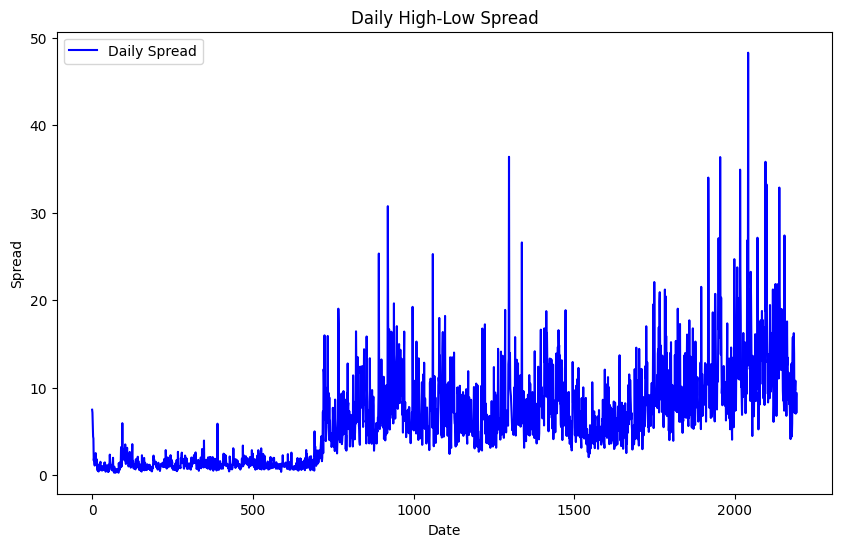

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Spread'], label='Daily Spread', color='blue')
plt.title('Daily High-Low Spread')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.show()

#### b. Close vs Adj Close    

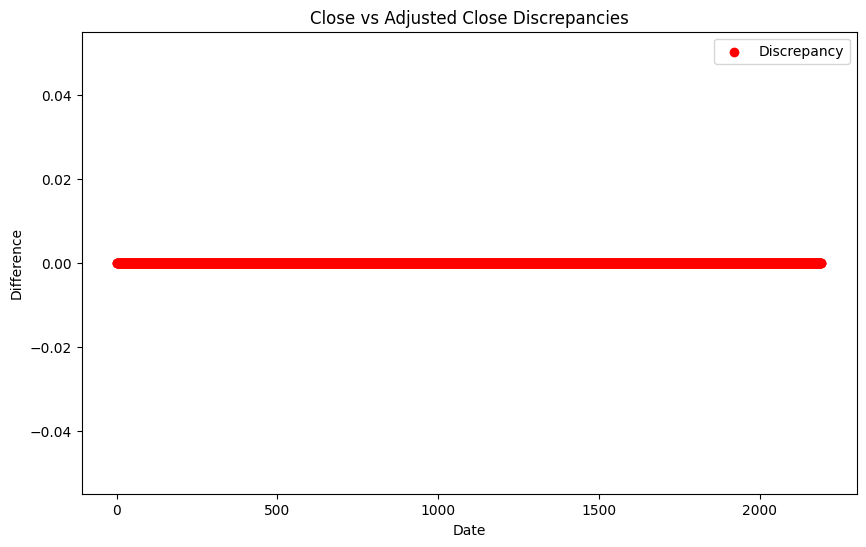

In [66]:
df['Close vs Adj Close Diff'] = df['Close'] - df['Adj Close']
threshold = 0.05
df['Significant Discrepancy'] = abs(df['Close vs Adj Close Diff'] / df['Close']) > threshold
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Close vs Adj Close Diff'], color='red', label='Discrepancy')
plt.title('Close vs Adjusted Close Discrepancies')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()
plt.show()


**Shows there is no descripancy between the close and adj close in the dataset**

#### c. Volume vs Price Movement

Correlation between Volume and Price Change: 0.4581565049403673


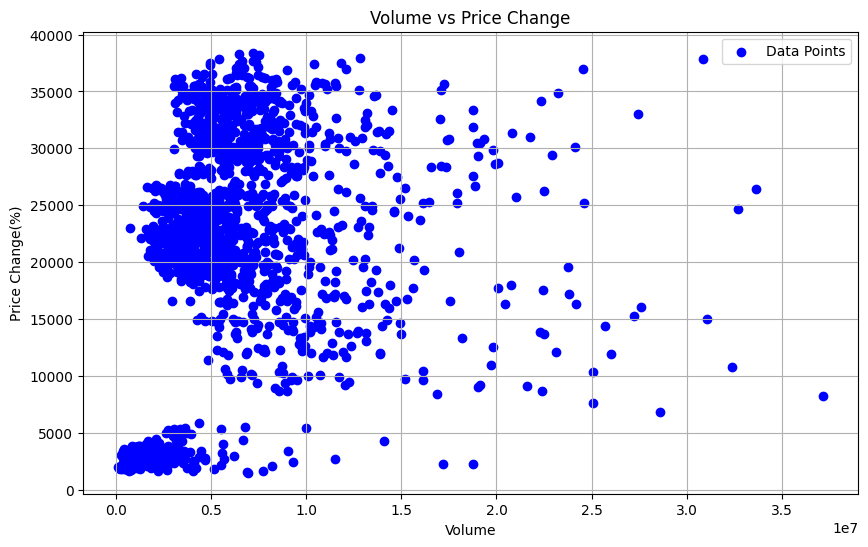

In [67]:

# Calculate Correlation between Volume and Price Change
df['Price Change(%)']=(df['Close'] -df['Open']/df['Open']) *100 
correlation = df['Volume'].corr(df['Price Change(%)'])
print(f"Correlation between Volume and Price Change: {correlation}")

# Plot Volume vs. Price Change (%)
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Price Change(%)'], color='blue', label='Data Points')
plt.title('Volume vs Price Change')
plt.xlabel('Volume')
plt.ylabel('Price Change(%)')
plt.legend()
plt.grid(True)
plt.show()

**The scatter plots of Volume vs Price Change reveal an interesting relationship between trading activity and price movements. The  plot show a dense concentration of data points in the lower volume range, while points become more dispersed at higher volumes. This distribution pattern suggests that while higher trading volumes don't necessarily correlate with larger price changes, there's significant price volatility across all volume levels, with the most extreme price variations occurring in the medium volume range. The absence of a strong linear relationship indicates that other market factors beyond trading volume play crucial roles in determining price movements.**


#### Correlation Matrix

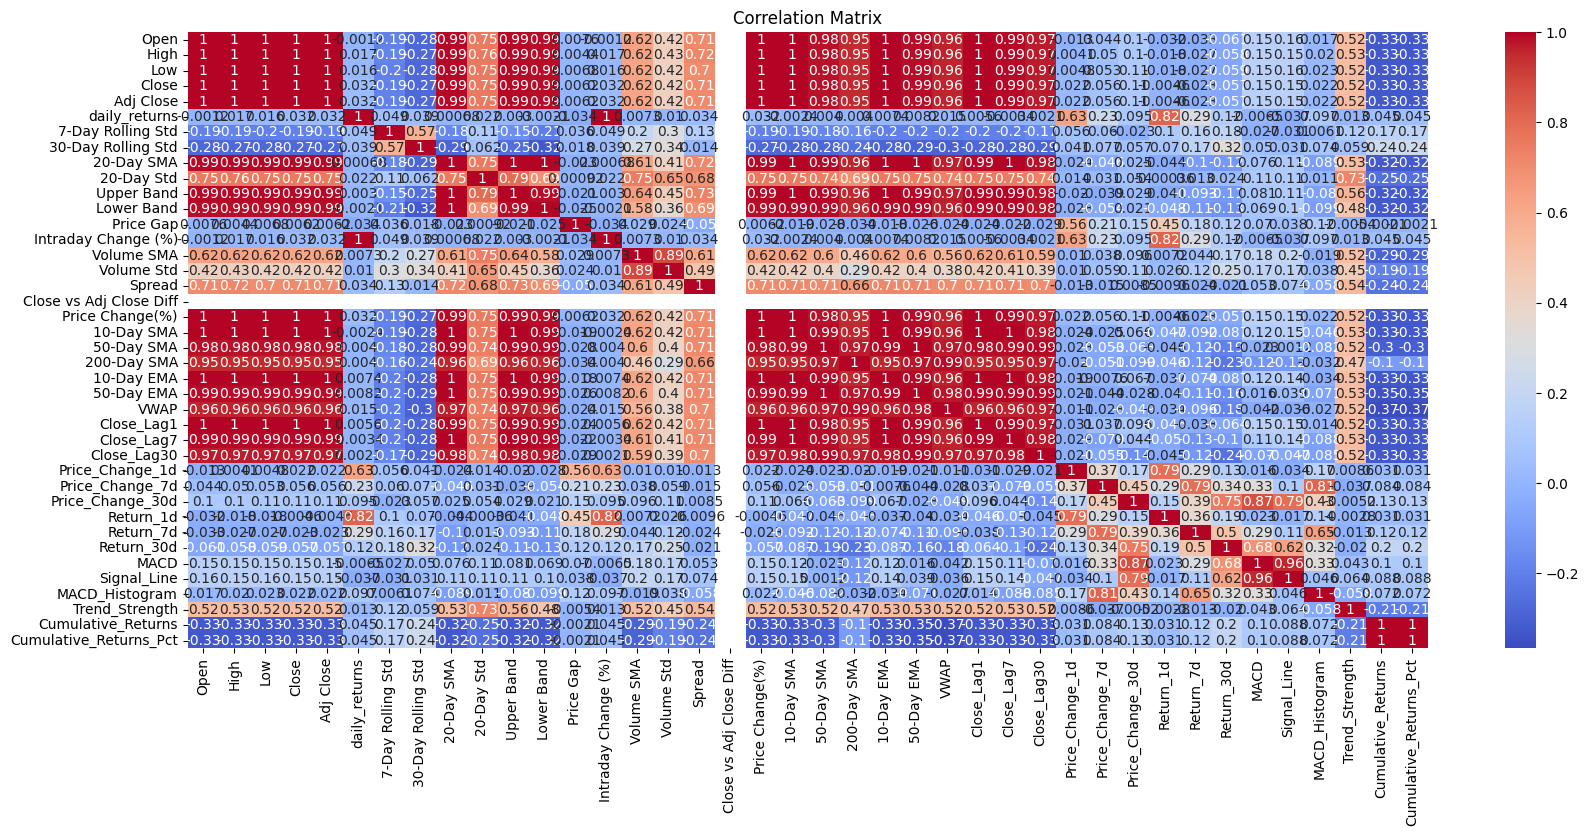

In [84]:
# Correlation Matrix
numeric_df = df.select_dtypes(include=['float64'])

plt.figure(figsize=(20,8))
sn.heatmap(numeric_df.corr(), 
            annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Moving Indicator & Trend Indicators
#### a. Short vs  Long Moving Averages
            

In [68]:
# Simple Moving Averages (SMA)
df['10-Day SMA'] = df['Close'].rolling(window=10).mean()
df['50-Day SMA'] = df['Close'].rolling(window=50).mean()
df['200-Day SMA'] = df['Close'].rolling(window=200).mean()

# Exponential Moving Averages (EMA)
df['10-Day EMA'] = df['Close'].ewm(span=10, adjust=False).mean()
df['50-Day EMA'] = df['Close'].ewm(span=50, adjust=False).mean()


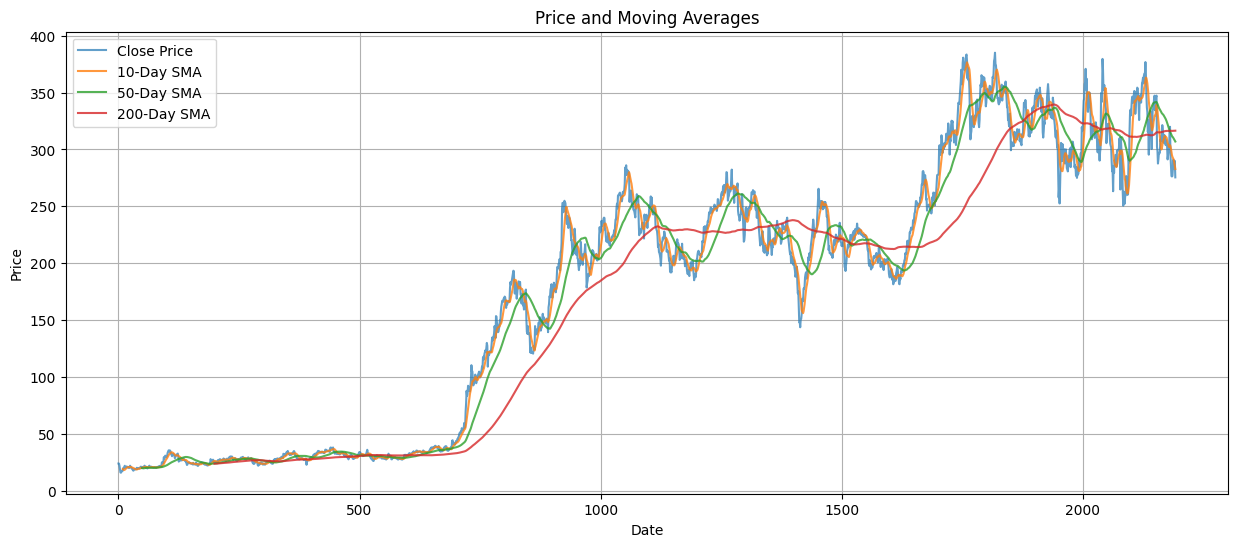

In [69]:
#  Price and Moving Averages
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Close'], label='Close Price', alpha=0.7)
plt.plot(df.index, df['10-Day SMA'], label='10-Day SMA', alpha=0.8)
plt.plot(df.index, df['50-Day SMA'], label='50-Day SMA', alpha=0.8)
plt.plot(df.index, df['200-Day SMA'], label='200-Day SMA', alpha=0.8)
plt.title('Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


**What do each of the crossovers signify?**<br>
:Short-term Crossovers (10-day SMA crossing 50-day SMA):
- Bullish Signal: When 10-day SMA crosses above 50-day SMA
- Bearish Signal: When 10-day SMA crosses below 50-day SMA

:These indicate shorter-term trend changes
- Golden Cross (50-day SMA crossing above 200-day SMA):
  -  Major bullish signal
   - Indicates potential long-term uptrend
   - Often used as a buy signal
- Death Cross (50-day SMA crossing below 200-day SMA):
  -  Major bearish signal
   - Indicates potential long-term downtrend
   - Often used as a sell signal

In [70]:
# Create columns for crossover detection
df['50_200_SMA_Signal'] = np.where(
    df['50-Day SMA'] > df['200-Day SMA'], 'Golden Cross', 'Death Cross'
)

# Detect actual crossover points
df['Crossover'] = np.where(
    (df['50-Day SMA'].shift(1) <= df['200-Day SMA'].shift(1)) &
    (df['50-Day SMA'] > df['200-Day SMA']), 'Golden Cross',
    np.where(
        (df['50-Day SMA'].shift(1) >= df['200-Day SMA'].shift(1)) &
        (df['50-Day SMA'] < df['200-Day SMA']), 'Death Cross', 'No Crossover'
    )
)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Weekday,daily_returns,...,Close vs Adj Close Diff,Significant Discrepancy,Price Change(%),10-Day SMA,50-Day SMA,200-Day SMA,10-Day EMA,50-Day EMA,50_200_SMA_Signal,Crossover
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,6,Tuesday,25.736837,...,0.0,False,2288.9999,NaN,NaN,NaN,23.889999,23.889999,Death Cross,No Crossover
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,6,Wednesday,-7.599848,...,0.0,False,2283.0000,NaN,NaN,NaN,23.879090,23.887646,Death Cross,No Crossover
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,7,Thursday,-12.160004,...,0.0,False,2095.9999,NaN,NaN,NaN,23.530164,23.812052,Death Cross,No Crossover
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,7,Friday,-16.521735,...,0.0,False,1820.0001,NaN,NaN,NaN,22.742862,23.631187,Death Cross,No Crossover
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,7,Tuesday,-19.449995,...,0.0,False,1511.0001,NaN,NaN,NaN,21.536887,23.336239,Death Cross,No Crossover


---

# 5. Volume & Market Analysis
#### a. Volume Spike Detection <br>
*(Already Done)* <br>
#### b.Volume Weighted Average Price(VWAP)

**VWAP**: 
VWAP (Volume Weighted Average Price) is a technical indicator that shows the average price of a stock weighted by its trading volume. It represents the true average price at which a security has traded throughout the day

In [71]:
# Calculate VWAP
Cumulative_Volume = df['Volume'].cumsum() #cumsum groups the cumullative sum for all the elements summed.
Volume_x_Price = df['Close'] * df['Volume']
Cumulative_Volume_x_Price= Volume_x_Price.cumsum()
df['VWAP'] = Cumulative_Volume_x_Price / Cumulative_Volume
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Month,Weekday,daily_returns,...,Significant Discrepancy,Price Change(%),10-Day SMA,50-Day SMA,200-Day SMA,10-Day EMA,50-Day EMA,50_200_SMA_Signal,Crossover,VWAP
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,6,Tuesday,25.736837,...,False,2288.9999,NaN,NaN,NaN,23.889999,23.889999,Death Cross,No Crossover,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,6,Wednesday,-7.599848,...,False,2283.0000,NaN,NaN,NaN,23.879090,23.887646,Death Cross,No Crossover,23.861317
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,7,Thursday,-12.160004,...,False,2095.9999,NaN,NaN,NaN,23.530164,23.812052,Death Cross,No Crossover,23.507553
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,7,Friday,-16.521735,...,False,1820.0001,NaN,NaN,NaN,22.742862,23.631187,Death Cross,No Crossover,23.058576
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,7,Tuesday,-19.449995,...,False,1511.0001,NaN,NaN,NaN,21.536887,23.336239,Death Cross,No Crossover,22.209233


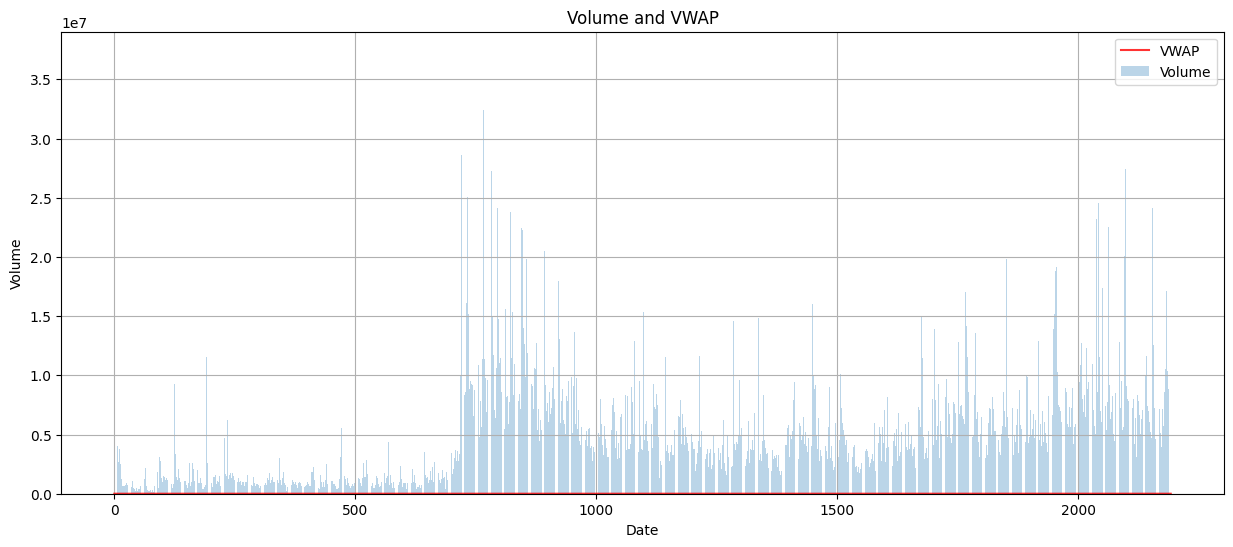

In [72]:

plt.figure(figsize=(15, 6))
plt.bar(df.index, df['Volume'], label='Volume', alpha=0.3)
plt.plot(df.index, df['VWAP'], label='VWAP', color='red', alpha=0.8)
plt.title('Volume and VWAP')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


#### c.Momentum Analysis 
*(Already Done)*

----

# 6. Lag Features & Time Series Transformations 
#### a.  Lagged Price Features: 


In [73]:
# Create lagged price features
df['Close_Lag1'] = df['Close'].shift(1)    # 1-day lag
df['Close_Lag7'] = df['Close'].shift(7)    # 7-day lag
df['Close_Lag30'] = df['Close'].shift(30)  # 30-day lag

# Calculate price changes from lagged values
df['Price_Change_1d'] = df['Close'] - df['Close_Lag1']
df['Price_Change_7d'] = df['Close'] - df['Close_Lag7']
df['Price_Change_30d'] = df['Close'] - df['Close_Lag30']

# Calculate percentage changes
df['Return_1d'] = (df['Close'] - df['Close_Lag1']) / df['Close_Lag1'] * 100
df['Return_7d'] = (df['Close'] - df['Close_Lag7']) / df['Close_Lag7'] * 100
df['Return_30d'] = (df['Close'] - df['Close_Lag30']) / df['Close_Lag30'] * 100
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Weekday,daily_returns,...,VWAP,Close_Lag1,Close_Lag7,Close_Lag30,Price_Change_1d,Price_Change_7d,Price_Change_30d,Return_1d,Return_7d,Return_30d
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,6,Tuesday,25.736837,...,23.889999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,6,Wednesday,-7.599848,...,23.861317,23.889999,NaN,NaN,-0.059999,NaN,NaN,-0.251147,NaN,NaN
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,7,Thursday,-12.160004,...,23.507553,23.830000,NaN,NaN,-1.870001,NaN,NaN,-7.847256,NaN,NaN
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,7,Friday,-16.521735,...,23.058576,21.959999,NaN,NaN,-2.759998,NaN,NaN,-12.568297,NaN,NaN
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,7,Tuesday,-19.449995,...,22.209233,19.200001,NaN,NaN,-3.090000,NaN,NaN,-16.093749,NaN,NaN


#### b. Rolling Mean and Standard Deviation

*(Already Done)*

 ----
# 7. Feature Engineering For ML models
#### a. Momentum Indicators

In [74]:
# Calculate MACD using your existing EMAs (10-Day and 50-Day)
df['MACD'] = df['10-Day EMA'] - df['50-Day EMA']

# Calculate Signal Line (9-day EMA of MACD)
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Calculate MACD Histogram
df['MACD_Histogram'] = df['MACD'] - df['Signal_Line']

# Identify Trend Direction
df['MACD_Trend'] = np.where(df['MACD'] > 0, 'Positive', 'Negative')

# Spot Trend Reversals (MACD crossing Signal Line)
df['MACD_Cross'] = np.where(
    (df['MACD'] > df['Signal_Line']) & (df['MACD'].shift(1) <= df['Signal_Line'].shift(1)), 
    'Bullish Crossover',
    np.where(
        (df['MACD'] < df['Signal_Line']) & (df['MACD'].shift(1) >= df['Signal_Line'].shift(1)),
        'Bearish Crossover',
        'No Crossover'
    )
)

# Measure Trend Strength
df['Trend_Strength'] = abs(df['MACD_Histogram'])



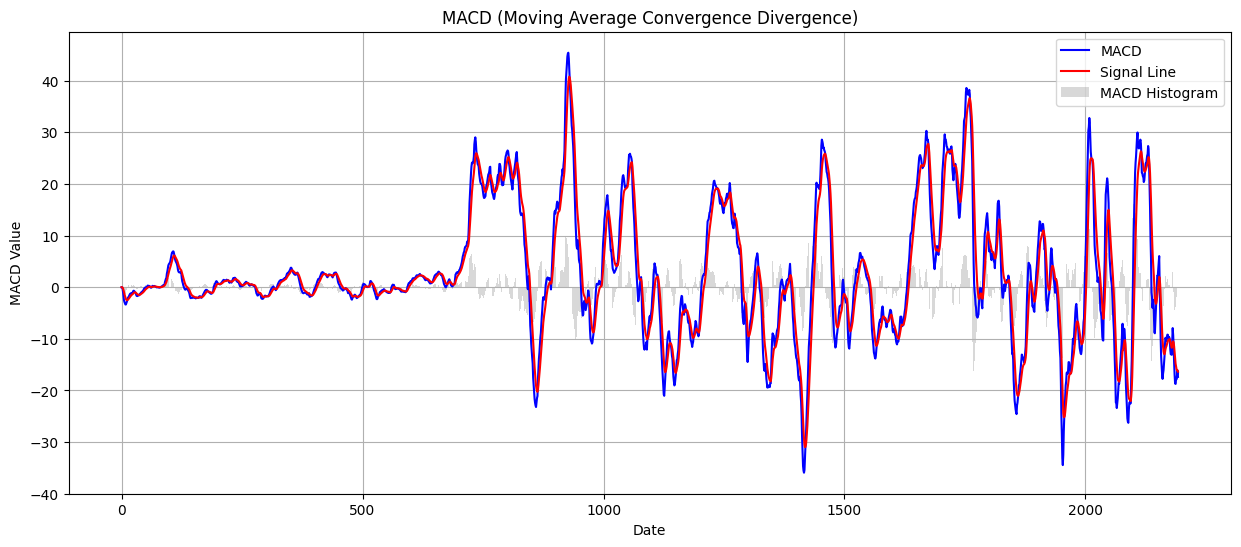

In [75]:
# Create MACD plot
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['MACD'], label='MACD', color='blue')
plt.plot(df.index, df['Signal_Line'], label='Signal Line', color='red')
plt.bar(df.index, df['MACD_Histogram'], label='MACD Histogram', color='gray', alpha=0.3)
plt.title('MACD (Moving Average Convergence Divergence)')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.grid(True)
plt.show()


 #### b. Cumulative Returns Calculation: 


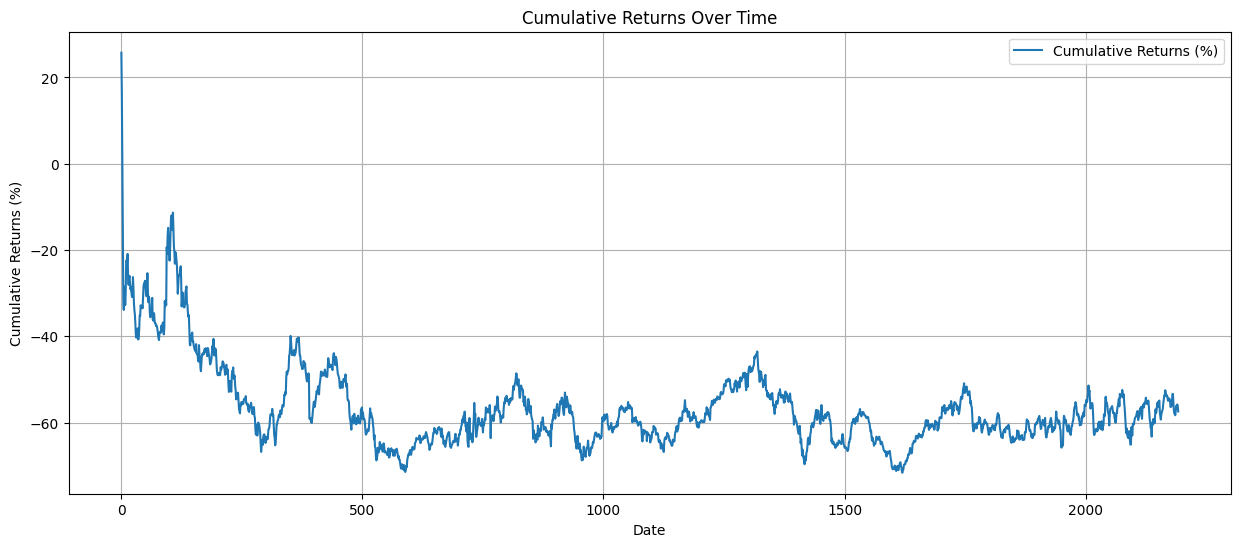

In [76]:
# Calculate cumulative returns using the daily returns
df['Cumulative_Returns'] = (1 + df['daily_returns']/100).cumprod() - 1

# Convert to percentage
df['Cumulative_Returns_Pct'] = df['Cumulative_Returns'] * 100

# Visualize cumulative returns
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Cumulative_Returns_Pct'], label='Cumulative Returns (%)')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (%)')
plt.legend()
plt.grid(True)
plt.show()


---

# Modelling 
`We will be using the model imported from scikit-learn library and test our model with `**r<sup>2</sup>-error** `and` **mean squared error**

#### Splitting the dataset 

In [77]:
# df.info ()

# numerical_col=df.select_dtypes(include=['int32','float64','int64']).columns.tolist()
# remove = ['7-Day Rolling Std','Lower Band', 'Price Gap','Volume SMA', 'Volume Std', '30-Day Rolling Std','20-Day SMA',  '10-Day SMA', '20-Day Std','Upper Band','Lower Band''10-Day SMA', '50-Day SMA', '200-Day SMA', '10-Day EMA', '50-Day EMA', 'VWAP', 'Close_Lag1', 'Close_Lag7', 'Close_Lag30', 'Price_Change_1d', 'Price_Change_7d', 'Price_Change_30d', 'Return_1d', 'Return_7d', 'Return_30d', 'MACD', 'Signal_Line', 'MACD_Histogram', 'Trend_Strength', 'Cumulative_Returns', 'Cumulative_Returns_Pct']
# for val in remove:
#     while val in numerical_col:
#         numerical_col.remove(val)

# print(numerical_col)

essential_col=['High','Low','Open','Volume'] 

`Note:` I decided to only use the essential column as my input parameter as when i fed the model with all the non null numerical columns (which included the essestial columns plus all the other columns which i engineered) as parameter, the model responded with a perfect r<sup>2</sup> score which sounded too good to be true. So i settled with just usng the original columns as my parameter.

In [78]:

x = df[essential_col]
num=x.isnull().sum()
print(num) 
print(x.shape)

y=np.array(df['Close'].values).reshape(-1,1)
print(y.shape)

# Scaling the data using standard scaler
featurescaler=StandardScaler()
targetscaler=StandardScaler()
x=featurescaler.fit_transform(x)
y=targetscaler.fit_transform(y)
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=50)
# print("X_train:",X_train)



High      0
Low       0
Open      0
Volume    0
dtype: int64
(2193, 4)
(2193, 1)


### Creating a Linear model 

In [79]:
Lm = LinearRegression() 
# We instantiate a linear regression mdoel 
Lm.fit(X_train,Y_train)

LinearRegression()

#### Visualizing the model Accuracy

(1535, 1)
(1535, 1)
          Actual   Predicted
0     225.610001  225.102360
1      33.900002   33.981373
2     104.629997  103.478406
3     323.100006  322.373238
4      21.360001   21.508879
...          ...         ...
1530  349.929993  353.522026
1531  291.510010  289.342078
1532  330.929993  337.353942
1533  219.699997  221.944923
1534  300.250000  298.805485

[1535 rows x 2 columns]


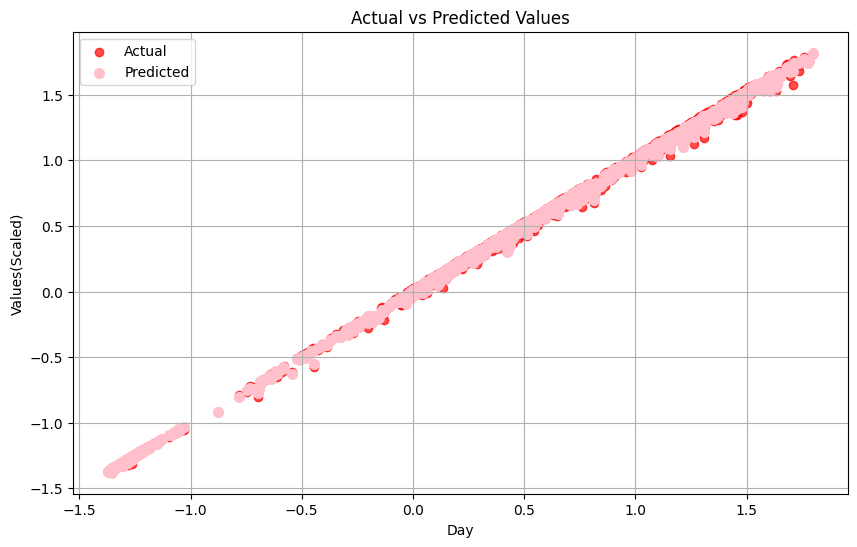

In [80]:
predicted = Lm.predict(X_train) #This creates a prediction of the stock prices 
# print(predicted)

# Compare the actual and predicted prices
actual_predicted= targetscaler.inverse_transform(predicted)
print(actual_predicted.shape)
Y_train_unscaled=targetscaler.inverse_transform(Y_train)
print(Y_train_unscaled.shape)
tabulated=pd.DataFrame({'Actual': Y_train_unscaled.flatten(), 'Predicted' : actual_predicted.flatten()})
print(tabulated)

# Plot the actual and predicted prices
plt.figure(figsize=(10, 6))# Plot actual vs predicted values    
plt.scatter(X_train.T[0], Y_train, color='red', label='Actual', alpha=0.7) # Scatter plot for actual values
plt.scatter(X_train.T[0], predicted, color='pink', label='Predicted', linewidth=2)  # Line plot for predicted values
plt.xlabel('Day')
plt.grid('True')
plt.ylabel('Values(Scaled)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

#### Finding the accuracy metrics

In [81]:
# Calculating the r2 scores
print(Y_train[0])
print(predicted[0])
r2_train = r2_score(Y_train, predicted)
r2_test = r2_score(Y_test, Lm.predict(X_test))



# Displaying  the scores
print("Metric      Train               Test")
print(f"r2_score    {r2_train:.4f}           {r2_test:.4f}")



[0.43236294]
[0.42796985]
Metric      Train               Test
r2_score    0.9997           0.9997


---


# Predicting future prices using the model

In [82]:
# Importing a new dataset whose closing price is to be predicted
to_be_predicted=pd.read_csv("tesla_Pred.csv")
# print(to_be_predicted)

# Dropping the unnamed column
to_be_predicted=to_be_predicted.drop(columns=['Unnamed: 0'])
# print(to_be_predicted)
# Predicting the Closing Price
Params=featurescaler.fit_transform(to_be_predicted)
# print("Params:",Params)
prediction=Lm.predict(Params)
# print(prediction)
predicted_unscaled = targetscaler.inverse_transform(prediction.reshape(-1, 1))
# print(predicted_unscaled)
to_be_predicted['Close']=predicted_unscaled
print(to_be_predicted.head())


     High     Low    Open   Volume       Close
0  608.56  522.13  563.36  1199098   20.461371
1  616.82  571.19  577.92  2870744  139.821282
2  665.43  569.48  613.69  3962125  186.939179
3  733.97  587.92  675.49  1128584  292.809107
4  790.79  536.57  780.82  4646729  155.826669


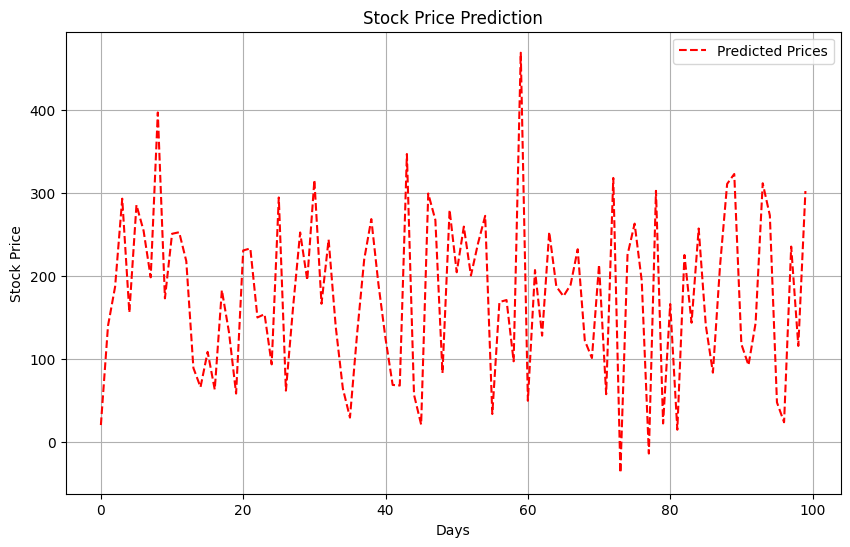

In [83]:
#  Visualizing the predictions
plt.figure(figsize=(10, 6))
plt.plot(to_be_predicted.index, to_be_predicted['Close'], label='Predicted Prices', color='Red', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()


----

# Final Verdict


This project entails a python based regression model which predicts the stock prices of tesla by using the historical data for the stocks that includes info like `Opening price , Closing Price , Adjusted Closing Price and the Volume of stocks traded`. This project uses the linear regression model provided by `scikit-learn` and uses `pandas` and `numpy` for data manipulation and preprocessing and for tasks like EDA and feature engineering. It also uses `seaborn` and `matplotlib` for visualization of the data.The effectiveness of the model is given by its accuracy and in this project the **R<sup>2</sup>**  is used as the metrics for the accuracy. Following table summarizes the accuracy test result.
<br>
|Metric   |   Train |              Test|
|--------|----------|-----------------|
|R<sup>2</sup> score |   0.9997   |       0.9997|


The model achieves an **R² score of  0.9997 for the training and  the test set**, indicating that it explains around 99.7% of the variance in the stock prices for both datasets.

These results suggest that the model performs well.Although,the scores are good, they are not perfect, which is expected given the complex and volatile nature of stock prices in general.  Overall, the model provides a solid foundation for predicting Tesla's stock prices based on historical data.

The model after its completion is then used to predict the close prices of the same stock for a dummy dataset created using the `random` and the `faker` libraries where the model uses the features supplied as parameters to predict the closing price which is then visualized later.

---

``CREATED BY: Sajan Sahikarmi`` <br> ``Roll Number: KCE080BCT035``

---